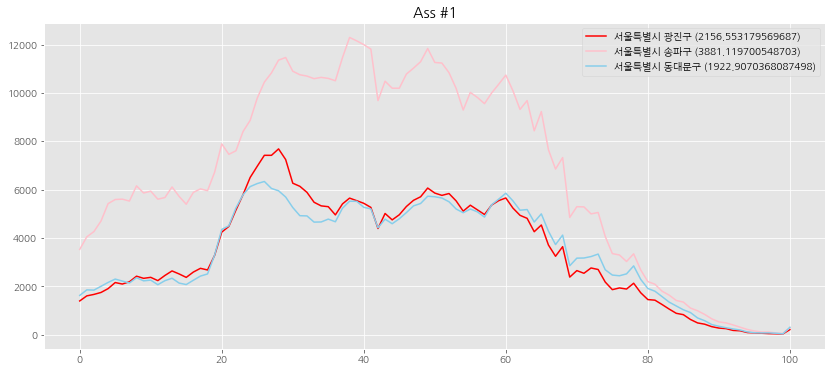

In [49]:
# -*- coding: utf-8 -*- 

# 실습 #1: '광진구'와 가장 비슷한 인구 구조를 가진 '구'와 가장 다른 인구 구조를 가진 '구' 를 찾아 그래프로 시각화하기
# 연령별 인구현황 (행정안전부): 2020-12 ~ 2020-12

import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

f = open('./data/202012_202012_연령별인구현황_월간.csv')
data = csv.reader(f, delimiter=',')

headers = next(data)

targetString = ""
target = []

maxString = ""
maxValue = 0
maxResult = []
minString = ""
minValue = 999999999999
minResult = []

# '광진구' data
for row in data:
    newData = np.array(row[4:])
    if '광진구' in row[1]:
        targetString = row[1]
        slist = []
        for s in row[4:]:
            slist.append(s.replace(',', '')) # "," 없애기
        target = np.array(slist, dtype=np.int32) # 32bit Integer
        break

# 찾기
f.seek(0)
next(data)
for row in data:
    if '광진구' in row[1]:
        continue
        
    slist = []
    for s in row[4:]:
        slist.append(s.replace(',', ''))
    newData = np.array(slist, dtype=np.int32)
    
    result = (target - newData)**2
    resultSum = np.sum(result)
    if resultSum > maxValue:
        maxValue = resultSum
        maxResult = newData
        maxString = row[1]
    elif resultSum < minValue:
        minValue = resultSum
        minResult = newData
        minString = row[1]

f.close()

# 그래프 출력
path = 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf' # 한글 출력
font_name = fm.FontProperties(fname=path, size=40).get_name()
plt.rc('font', family=font_name)
plt.figure(figsize=(14,6))

plt.title('Ass #1')
plt.style.use('ggplot') #격자무늬 그래프
plt.plot(target, color='red', label= targetString +"(" + str(np.std(target)) +")") # 표준편차 np.std()
plt.plot(maxResult, color='pink', label=maxString+"(" + str(np.std(maxResult)) +")")
plt.plot(minResult, color='skyblue', label=minString+"(" + str(np.std(minResult)) +")")
plt.legend()
plt.show()